In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from dagmm import DAGMM
from sklearn.preprocessing import MinMaxScaler
import time

CSV_FILE_PATH ='F:\python_code\imba_09-11181308-MachineLearningCVE\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
df = pd.read_csv(CSV_FILE_PATH)
df=df.drop(['Flow Bytes/s',' Flow Packets/s'],axis=1)

#归一化
sc = MinMaxScaler(feature_range=(0, 1))  
Dataset = df.values
labels=Dataset[:,-1]
Dataset=Dataset[:,0:-1]
labels= np.where(labels!='BENIGN',0,1)#处理数据

df = sc.fit_transform(Dataset)

x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.50, random_state=123)
x_train, y_train = x_train[y_train == 0], y_train[y_train == 0]

print("training...")
start=time.time()
model = DAGMM(
    comp_hiddens=[40, 20, 10, 1], comp_activation=tf.nn.tanh,
    est_hiddens=[10, 5], est_dropout_ratio=0.5, est_activation=tf.nn.tanh,
    learning_rate=0.0001, epoch_size=200, minibatch_size=1024, random_seed=1111
)

model.fit(x_train)
end=time.time()
print(end-start)
print('done')

c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\daysl\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\daysl\appd

training...
 epoch 10/200 : loss = 34.913
 epoch 20/200 : loss = 18.773
 epoch 30/200 : loss = 15.988
 epoch 40/200 : loss = 15.553
 epoch 50/200 : loss = 15.314
 epoch 60/200 : loss = 15.085
 epoch 70/200 : loss = 14.790
 epoch 80/200 : loss = 13.911
 epoch 90/200 : loss = 12.798
 epoch 100/200 : loss = 12.443
 epoch 110/200 : loss = 12.271
 epoch 120/200 : loss = 12.124
 epoch 130/200 : loss = 11.960
 epoch 140/200 : loss = 11.785
 epoch 150/200 : loss = 11.608
 epoch 160/200 : loss = 11.442
 epoch 170/200 : loss = 11.276
 epoch 180/200 : loss = 11.085
 epoch 190/200 : loss = 10.858
 epoch 200/200 : loss = 10.659
148.3287935256958
done


In [2]:
count_0,count_1=0,0
for i in range(len(y_test)):
    if labels[i]==0:
        count_0+=1
    if labels[i]==1:
        count_1+=1
print(count_0,count_1)
print(count_0/(count_0+count_1))

y_pred = model.predict(x_test)

# Energy thleshold to detect anomaly = 80% percentile of energies
anomaly_energy_threshold = np.percentile(y_pred, 61)
print(f"Energy thleshold to detect anomaly : {anomaly_energy_threshold:.3f}")
# Detect anomalies from test data
y_pred_flag = np.where(y_pred >= anomaly_energy_threshold, 1, 0)
prec, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_flag, average="binary")
print(f" Precision = {prec:.3f}")
print(f" Recall    = {recall:.3f}")
print(f" F1-Score  = {fscore:.3f}")

69636 43237
0.6169411639630381
Energy thleshold to detect anomaly : 41.146
 Precision = 1.000
 Recall    = 0.902
 F1-Score  = 0.948


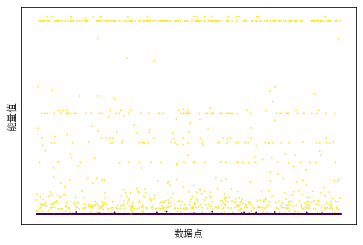

In [10]:
import matplotlib.pyplot as plt
import matplotlib
songTi = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')
x=[]
for i in range(len(y_pred)):
    x.append(i)

plt.scatter(x[:2000],y_pred[:2000],s=0.5,c=y_test[:2000])
plt.xlabel("数据点",fontproperties=songTi)
plt.ylabel("能量值",fontproperties=songTi)
plt.xticks([])
plt.yticks([])
# plt.yticks([])
plt.show()